# Milestone 4: Linear Regression Model for Rating Prediction


## Steps

### 1. Import Libraries

Necessary libraries for data manipulation, modeling, evaluation, and visualization are imported, including pandas, numpy, matplotlib, scikit-learn modules, and XGBoost.

### 2. Load Data

Data is loaded from a CSV file. Features selected include normalized release year, number of votes, and genre indicators. The target variable is the normalized IMDb rating.

### 3. Create Pipelines

Pipelines are set up for different models, starting with PolynomialFeatures to capture nonlinear relationships, followed by the linear regression model.

### 4. Define Hyperparameters

Hyperparameter grids are defined for each model to optimize performance using GridSearchCV. For linear regression, degrees of polynomial features are specified.

### 5. Evaluate Model

Models are evaluated using RMSE, MAE, and R² score to assess accuracy and explanatory power.

### 6. Plot Results

Predicted vs. actual ratings are visualized with scatter plots and an ideal fit line to assess model performance.

### 7. Run Experiment

Models are trained and evaluated. Hyperparameter tuning is performed where applicable. Results are compiled into a DataFrame sorted by R² score.

### 8. Main Execution

The main function orchestrates data loading, splitting (80-20), pipeline creation, hyperparameter setup, experiment execution, and displays the comparison results.


## Conclusion

The linear regression model achieved an R² score of **0.302741**, demonstrating its performance compared to other models. XGBoost showed the highest R², indicating better predictive capability.


Processing Linear Regression...
Best params: {'poly__degree': 1}


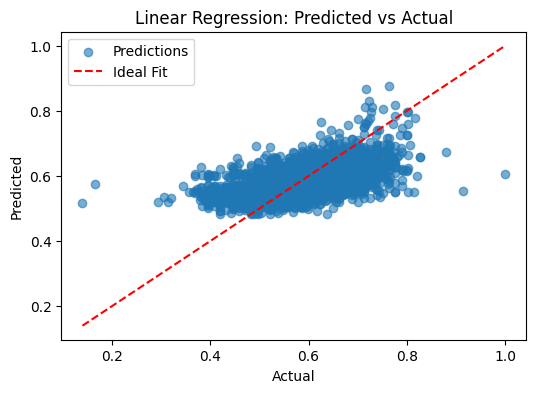

Processing Ridge Regression...
Best params: {'model__alpha': 0.1, 'poly__degree': 2}


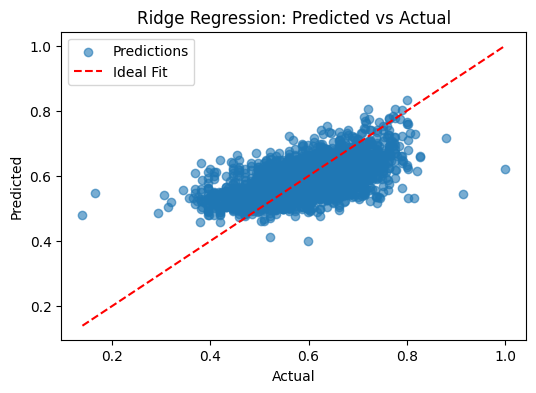

Processing Lasso Regression...
Best params: {'model__alpha': 0.001, 'poly__degree': 3}


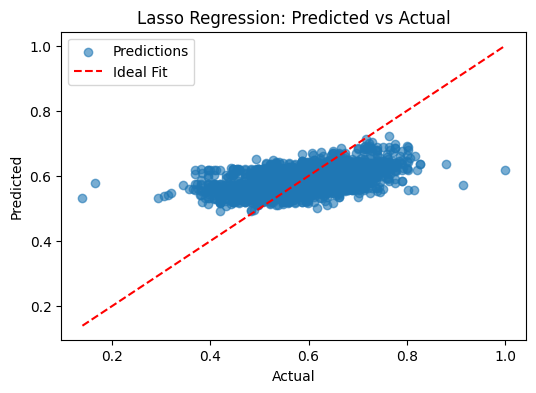

Processing Elastic Net...
Best params: {'model__alpha': 0.001, 'model__l1_ratio': 0.1, 'poly__degree': 3}


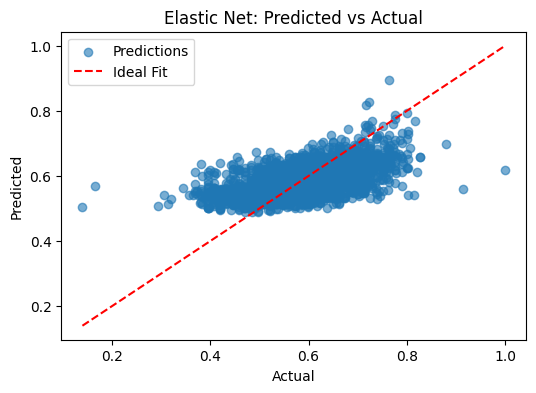

Processing Decision Tree...
Best params: {'model__max_depth': 10, 'model__min_samples_leaf': 10}


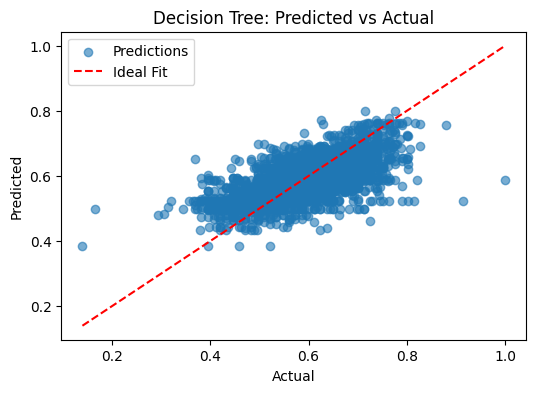

Processing Random Forest...
Best params: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__n_estimators': 400}


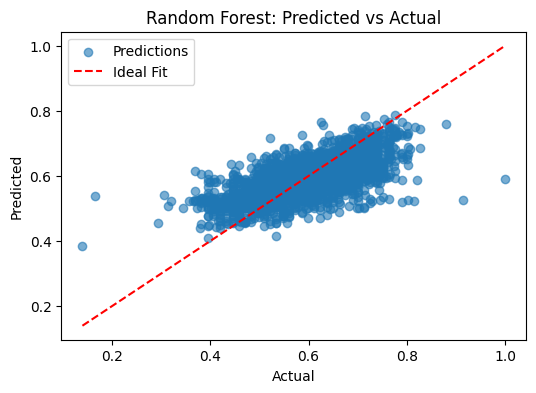

Processing Gradient Boosting...
Best params: {'model__learning_rate': 0.01, 'model__max_depth': 7, 'model__n_estimators': 500}


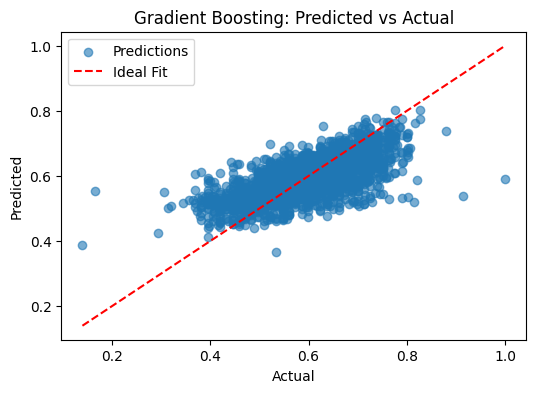

Processing Neural Network...
Best params: {'model__alpha': 0.001, 'model__hidden_layer_sizes': (128, 64)}


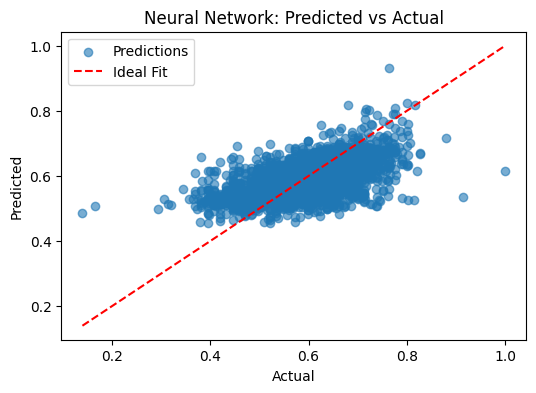

Processing XGBoost...
Best params: {'model__learning_rate': 0.01, 'model__max_depth': 7, 'model__n_estimators': 500, 'model__subsample': 0.7}


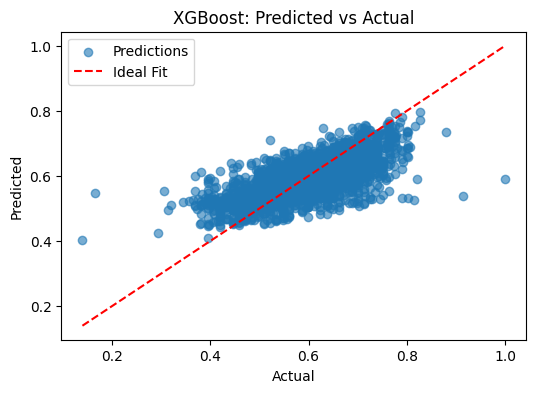

Model Comparison Results (Sorted by R²):
               Model      RMSE       MAE        R2
8            XGBoost  0.065969  0.050458  0.491082
6  Gradient Boosting  0.066603  0.050980  0.481253
5      Random Forest  0.067879  0.052031  0.461193
4      Decision Tree  0.070933  0.054955  0.411610
1   Ridge Regression  0.073991  0.058231  0.359787
7     Neural Network  0.075343  0.059152  0.336170
3        Elastic Net  0.075592  0.059654  0.331773
0  Linear Regression  0.077217  0.061001  0.302741
2   Lasso Regression  0.079290  0.063129  0.264799


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Install XGBoost if not installed
# You can uncomment the following line to install XGBoost
# !pip install xgboost
from xgboost import XGBRegressor


def load_data(file_path):
    """Load data from CSV."""
    data = pd.read_csv(file_path)
    features = ['normalized_Release Year', 'normalized_Number of Votes'] + \
               [col for col in data.columns if col.startswith('Genre_')]
    X = data[features]
    y = data['normalized_IMDb Rating']
    return X, y


def create_pipelines():
    """Initialize model pipelines."""
    poly = PolynomialFeatures(include_bias=False, degree=2)
    return {
        'Linear Regression': Pipeline([
            ('poly', poly),
            ('model', LinearRegression())
        ]),
        'Ridge Regression': Pipeline([
            ('poly', poly),
            ('model', Ridge())
        ]),
        'Lasso Regression': Pipeline([
            ('poly', poly),
            ('model', Lasso(max_iter=50000))
        ]),
        'Elastic Net': Pipeline([
            ('poly', poly),
            ('model', ElasticNet(max_iter=50000, random_state=42))
        ]),
        'Decision Tree': Pipeline([
            ('model', DecisionTreeRegressor(random_state=42))
        ]),
        'Random Forest': Pipeline([
            ('model', RandomForestRegressor(random_state=42))
        ]),
        'Gradient Boosting': Pipeline([
            ('model', GradientBoostingRegressor(random_state=42))
        ]),
        'Neural Network': Pipeline([
            ('model', MLPRegressor(max_iter=50000, random_state=42))
        ]),
        'XGBoost': Pipeline([
            ('model', XGBRegressor(random_state=42, verbosity=0))
        ])
    }


def create_param_grids():
    """Define hyperparameters."""
    return {
        'Linear Regression': {'poly__degree': [1, 2, 3]},
        'Ridge Regression': {
            'poly__degree': [1, 2, 3],
            'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
        },
        'Lasso Regression': {
            'poly__degree': [1, 2, 3],
            'model__alpha': [1e-3, 1e-2, 1e-1, 1.0, 10.0]
        },
        'Elastic Net': {
            'poly__degree': [1, 2, 3],
            'model__alpha': [1e-3, 1e-2, 1e-1, 1.0, 10.0],
            'model__l1_ratio': [0.1, 0.5, 0.7, 0.9]
        },
        'Decision Tree': {
            'model__max_depth': [None, 5, 10, 20],
            'model__min_samples_leaf': [1, 2, 5, 10]
        },
        'Random Forest': {
            'model__n_estimators': [100,200,300,400,500],
            'model__max_depth': [None, 5, 10],
            'model__min_samples_leaf': [1, 2, 5]
        },
        'Gradient Boosting': {
            'model__n_estimators': [100, 200,300,400,500],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 7]
        },
        'Neural Network': {
            'model__hidden_layer_sizes': [(64, 64), (128, 64), (128, 128)],
            'model__alpha': [1e-5, 1e-4, 1e-3]
        },
        'XGBoost': {
            'model__n_estimators': [100, 200, 300, 400, 500],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 7],
            'model__subsample': [0.7, 0.8, 1.0]
        }
    }


def evaluate_model(model, X_test, y_test):
    """Compute metrics."""
    y_pred = model.predict(X_test)
    metrics = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }
    return metrics, y_pred


def plot_results(y_test, y_pred, model_name):
    """Plot predictions vs actual."""
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.6, label='Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
    plt.title(f'{model_name}: Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()


def run_experiment(pipelines, param_grids, X_train, X_test, y_train, y_test):
    """Train and evaluate models."""
    results = []
    for name, pipeline in pipelines.items():
        print(f"Processing {name}...")
        params = param_grids.get(name)
        if params:
            grid = GridSearchCV(
                pipeline,
                params,
                cv=5,
                scoring='neg_mean_squared_error',
                n_jobs=1,
                verbose=0
            )
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
            print(f"Best params: {grid.best_params_}")
        else:
            pipeline.fit(X_train, y_train)
            best_model = pipeline
        metrics, y_pred = evaluate_model(best_model, X_test, y_test)
        results.append({'Model': name, **metrics})
        plot_results(y_test, y_pred, name)
    results_df = pd.DataFrame(results)
    # Sort by R2 descending
    results_df.sort_values(by='R2', ascending=False, inplace=True)
    return results_df


def main():
    """Main execution."""
    file_path = '/Users/i2gunshaker/top11k_movies_cleaned2.csv'
    X, y = load_data(file_path)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    pipelines = create_pipelines()
    param_grids = create_param_grids()
    results_df = run_experiment(pipelines, param_grids, X_train, X_test, y_train, y_test)
    print("Model Comparison Results (Sorted by R²):")
    print(results_df)


if __name__ == "__main__":
    main()
